### Semana 4: Geodésicas tipo tiempo - órbitas ligadas

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

plt.style.use('bmh')

#### Gráfica del potencial efectivo para órbitas ligadas no circulares:

El potencial efectivo está dado por
$$
\tilde{V}(r) = \left( 1 - \frac{2m}{r} \right) \left( 1 + \frac{h^2 m^2}{r^2}\right), \quad r > 2m.
$$

Si definimos la variable adimensional $\bar{r}:= r/m$, 
$$
\tilde{V}(\bar{r}) = \left( 1 - \frac{2}{\bar{r}} \right) \left( 1 + \frac{h^2}{\bar{r}^2}\right), \quad \bar{r} > 2. 
$$

In [4]:
#Definición del potencial:
def V(r,h):
    return (1 - 2/r)*(1 + h**2/r**2)

In [5]:
#Dominio r y valores para h y k:
r = np.linspace(2,100,10**4) 
h = 4.3
k2 = 0.97

Para calcular el $r_{\text{mín}}$ y $r_{\text{máx}}$ debemos resolver la siguiente ecuación:
$$
\tilde{V}(\bar{r}) = \left( 1 - \frac{2}{\bar{r}} \right) \left( 1 + \frac{h^2}{\bar{r}^2}\right) = k^2.
$$

Para ello, encontremos los ceros del polinomio
$$
p(x) = -2h^2 x^3 + h^2 x^2 -2x+1 - k^2,
$$

donde $x:= 1/\bar{r}$.

In [6]:
#Cálculo de r_min y r_max:
x = np.sort(np.roots([-2*h**2,h**2,-2,1 - k2]))

r_max = 1/x[0]
r_min = 1/x[1]

C:\Users\asaav\AppData\Local\Temp\ipykernel_2612\3884190451.py:8: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,100)


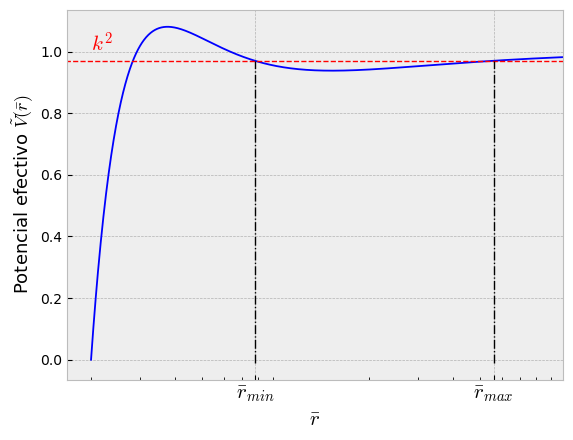

In [7]:
#Gráfica del potencial efectivo:
plt.plot(r,V(r,h), color = 'blue', linewidth = 1.3)
plt.hlines(k2,xmin= 0.0, xmax= r[-1], linewidth = 1, linestyles = '--', color = 'red')
plt.text(2,k2 + 0.03,'$k^2$', color = 'red', fontsize = 15)
plt.vlines([r_min,r_max],ymin= -1e-2, ymax= [k2,k2], linewidth = 1, linestyles = '-.', color = 'black')

plt.xscale('log')
plt.xlim(0,100)
plt.xticks([r_min,r_max],['$\\bar{r}_{min}$','$\\bar{r}_{max}$'],fontsize = 15)
plt.grid(True)

plt.xlabel('$\\bar{r}$',fontsize = 15)
plt.ylabel('Potencial efectivo $\\tilde{V}(\\bar{r})$',fontsize = 13)
plt.savefig('Potencial_Efectivo_orbita-ligada.pdf')

#### Gráficas de órbitas ligadas no circulares:

Sea $w(\varphi) = h^2m/r(\varphi)$, la ecuación para la coordenada radial toma la forma
$$
w'' + w = 1 + \epsilon w^2,
$$
donde $\epsilon = 3/h^2$. 

Si definimos 
\begin{aligned}
y_1 &= w, \\
y_2 &= w',
\end{aligned}
la EDO de segundo orden pasa a ser el siguiente sistema de EDO's de primer orden:
\begin{aligned}
y_1' &= y_2, \\
y_2 &= 1 + \epsilon w^2 - y_1.
\end{aligned}

In [8]:
#Definición del sistema de EDO's:
def dfdx(phi,f,ep):
    #Definiciones de f = [w,dw]:
    y_1,y_2 = f

    #Sist. de EDO's:
    dy_1 = y_2
    dy_2 = 1 + ep*y_1**2 - y_1

    return [dy_1,dy_2]

#### Órbita de mercurio:

In [9]:
#Cálculo de los parámetros epsilon para mercurio y m para el sistema solar:
G = 6.67430e-11 #[m^3 kg^-1 s^-2] 
c = 299792458 #[m/s]
M = 1.988e30  #[kg]
a = 57.909e9  #semieje mayor [m]
peri = 46e9   #perihelio [m]
afe = 69.818  #afelio [m]

ep = (3*G*M)/(c**2*a)
m = (G*M)/(c**2)

print('El valor de epsilon para mercurio es:',ep)
print('El valor de m es:',m)

El valor de epsilon para mercurio es: 7.64814102212501e-08
El valor de m es: 1476.3206615007905


In [10]:
#Condiciones iniciales:
w_0 = (3*m)/(ep*peri)

f0 = [w_0,0.0]   #[w_0,dw_0]

In [11]:
#Dominio de integración para tau (tiempo propio):
phi_max = 10*np.pi                      
phi = np.linspace(0.0,phi_max,300)

#Integración numérica:
sol = solve_ivp(dfdx, t_span = [phi[0],phi[-1]], y0 = f0, args=(ep,), method= 'RK45', t_eval = phi, rtol = 1e-8, atol = 1e-16)

In [12]:
#Función polares -> cartesianas:
def carte(r,ph):
    x = r*np.cos(ph)
    y = r*np.sin(ph)  
    return [x,y]  

In [13]:
#Solución en coordenadas polares:
r = (3*m)/(ep*sol.y[0])

#Solución en coordenadas cartesianas:
sol_carte = carte(r/peri,phi)

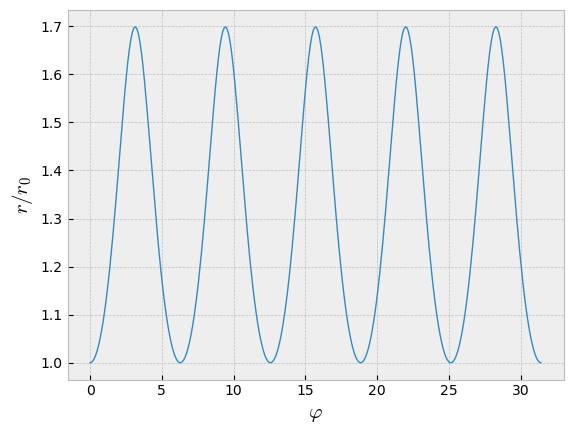

In [14]:
#Gráfica de r vs phi:
plt.plot(phi,r/peri,linewidth = 1)

plt.xlabel('$\\varphi$', fontsize = 15)
plt.ylabel('$r/r_0$', fontsize = 15)

plt.grid(True, linestyle = '--', alpha = 0.8)

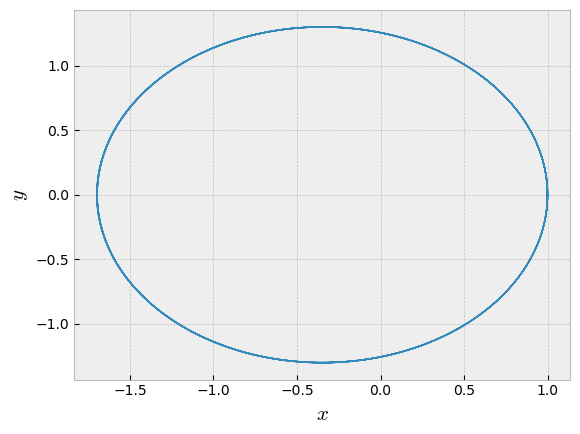

In [22]:
#Gráfica en el plano xy:
plt.plot(sol_carte[0],sol_carte[1],linewidth = 1)

plt.xlabel('$x$', fontsize = 15)
plt.ylabel('$y$', fontsize = 15)
plt.grid(True, linestyle = '--', alpha = 0.8)

#### Corrimiento del perihelio exagerado:

In [23]:
#Condiciones iniciales:
ep1 = 0.02
w_0 = 0.1
r01 = (3*m)/(ep1*w_0)

f0 = [w_0,0.0]   #[w_0,dw_0]

In [24]:
#Dominio de integración para tau (tiempo propio):
phi_max1 = 10*np.pi                      
phi1 = np.linspace(0.0,phi_max1,800)

#Integración numérica:
sol1 = solve_ivp(dfdx, t_span = [phi1[0],phi1[-1]], y0 = f0, args=(ep1,), method= 'RK45', t_eval = phi1, rtol = 1e-8, atol = 1e-16)

In [25]:
#Solución en coordenadas polares:
r1 = (3*m)/(ep1*sol1.y[0])

#Solución en coordenadas cartesianas:
sol_carte1 = carte(r1/r01,phi1)

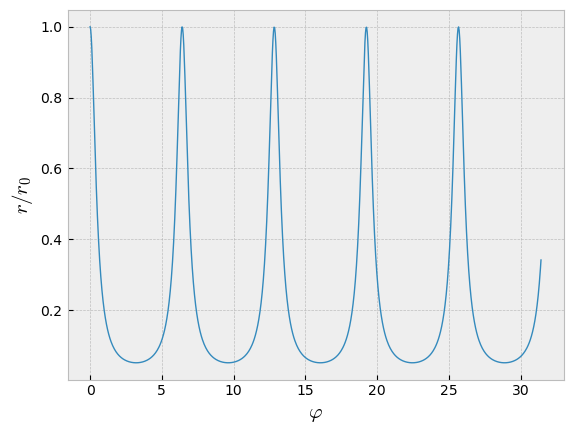

In [26]:
#Gráfica de r vs phi:
plt.plot(phi1,r1/r01,linewidth = 1)

plt.xlabel('$\\varphi$', fontsize = 15)
plt.ylabel('$r/r_0$', fontsize = 15)

plt.grid(True, linestyle = '--', alpha = 0.8)

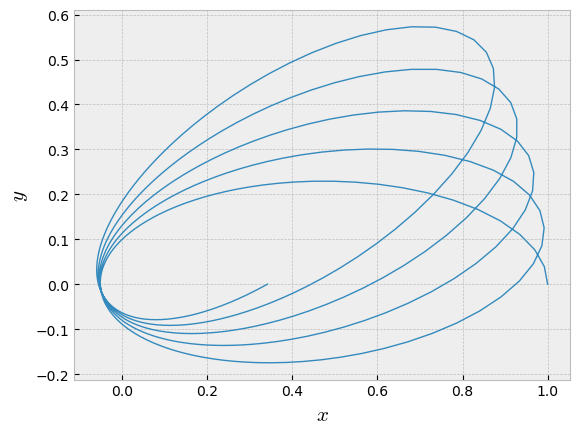

In [27]:
#Gráfica en el plano xy:
plt.plot(sol_carte1[0],sol_carte1[1],linewidth = 1)

plt.xlabel('$x$', fontsize = 15)
plt.ylabel('$y$', fontsize = 15)
plt.grid(True, linestyle = '--', alpha = 0.8)

In [28]:
#Animación en 3d de la órbita:
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

In [29]:
#Función que actualiza los frames:
def update(i,sol):
    ax.cla()     #Clear axis

    x,y = sol

    ax.scatter(x[i-1],y[i-1],0,s = 10, marker = 'o', color = 'red')    #Cuerpo orbitante
    ax.plot(x[:i],y[:i],np.zeros(len(x[:i])), linewidth = 1.0, color = 'red')              #Trayectoria del cuerpo
    ax.scatter(0,0,0,s = 30,marker = 'o', color = 'gold')                  #Masa central
               
    ax.set_xlim(-1,1.1)
    ax.set_ylim(-1,1.1)
    ax.set_zlim(-1,1.1)

    ax.set_xlabel('$x$', fontsize = 15, labelpad=-10)
    ax.set_ylabel('$y$', fontsize = 15, labelpad=-10)
    ax.set_zlabel('$z$', fontsize = 15, labelpad=-10)

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])

    #ax.view_init(-140, 60) 

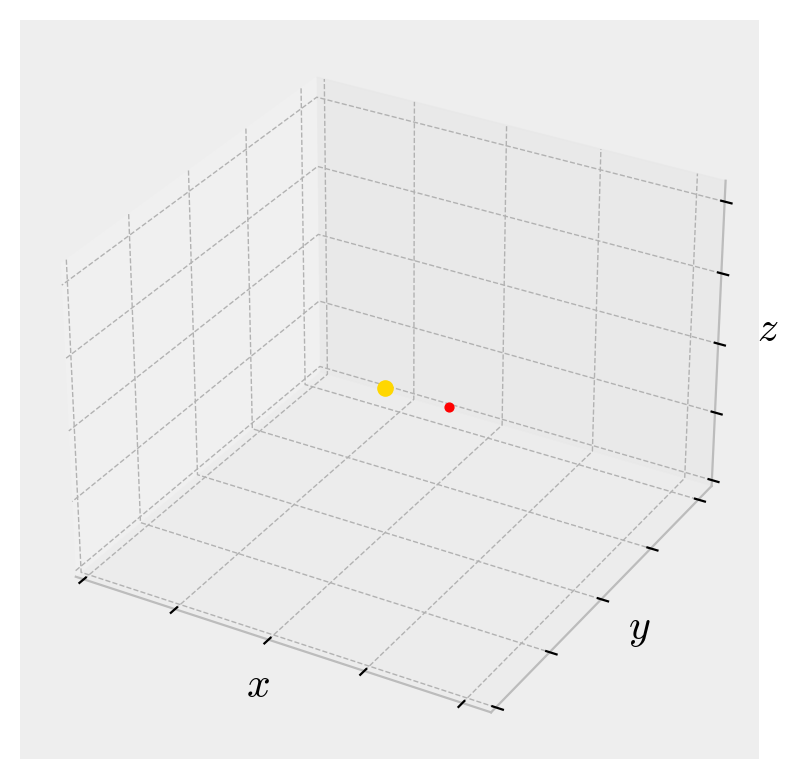

In [51]:
#Creación de la figura y ejes que contienen la animación:
fig = plt.figure(dpi=200)
ax = fig.add_subplot(projection = '3d')

anim = animation.FuncAnimation(fig, func = update, fargs = (sol_carte1,), frames = len(sol_carte1[0]), interval = 1)
anim.save('Schwarzschild-corrimiento-perihelio.gif')